 Gerekli kütüphaneler

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"]

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
df.shape

(7043, 21)

churn columnu 0 ve 1 olucak şekilde dönüştürdüm.

In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

eksik değerlere baktım  eksik olanalrı çıkarttım.

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

4 yeni özellik

In [ ]:
df["NEW_TotalServices"] = (df[["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup",
                               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]] == "Yes").sum(axis=1)
df["Streaming_Flag"] = ((df["StreamingTV"] == "Yes") | (df["StreamingMovies"] == "Yes")).astype(int)
df["Young_Engaged"] = ((df["SeniorCitizen"] == 0) & (df["Contract"] == "One year")).astype(int)
df["AutoPayment_Active"] = df["PaymentMethod"].str.contains("automatic", case=False).astype(int)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,Streaming_Flag,Young_Engaged,AutoPayment_Active
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,0,3,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,3,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,1,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,0,0,0


sadece 2 farklı değere sahip columnları bulma

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
multi = [col for col in categorical_cols if df[col].nunique() > 2 and col != 'customerID']
multi

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [ ]:
df = pd.get_dummies(df, columns=multi, drop_first=True)

In [ ]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'Streaming_Flag',
 'Young_Engaged',
 'AutoPayment_Active',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [ ]:
le = LabelEncoder()
for column in binary_columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NEW_TotalServices']

In [ ]:
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
X = df.drop(columns=["customerID", "Churn"])
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("\n🚦 SMOTE Sonrası Sınıf Dağılımı:")
print(y_resampled.value_counts())


🚦 SMOTE Sonrası Sınıf Dağılımı:
Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Kullanılacak modeller
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Sonuçları tutmak için tablo
results = []

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_proba), 3)
    })

# DataFrame olarak göster
import pandas as pd
results_df = pd.DataFrame(results).sort_values("ROC AUC", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.786,0.571,0.767,0.654,0.856
4,Gradient Boosting,0.762,0.536,0.759,0.628,0.852
3,Random Forest,0.772,0.563,0.625,0.592,0.833
1,KNN Classifier,0.725,0.488,0.735,0.586,0.789
2,Decision Tree,0.718,0.471,0.542,0.504,0.661


tabloya baktığımızda en iyi performansın Logistic Regression nın verdiğini gözüküyor.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hiperparametre aralığını tanımla
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV ile modeli hazırla
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# SMOTE uygulanmış veride eğit
grid_search.fit(X_resampled, y_resampled)

# En iyi parametreler ve skor
print("✅ En iyi parametreler:", grid_search.best_params_)
print("✅ En iyi ROC AUC skoru:", round(grid_search.best_score_, 3))

# Test verisinde skorla
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("Test ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
✅ En iyi ROC AUC skoru: 0.92
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1036
           1       0.57      0.62      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Test ROC AUC: 0.834


<ipython-input-26-a6dd0400e5c7>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


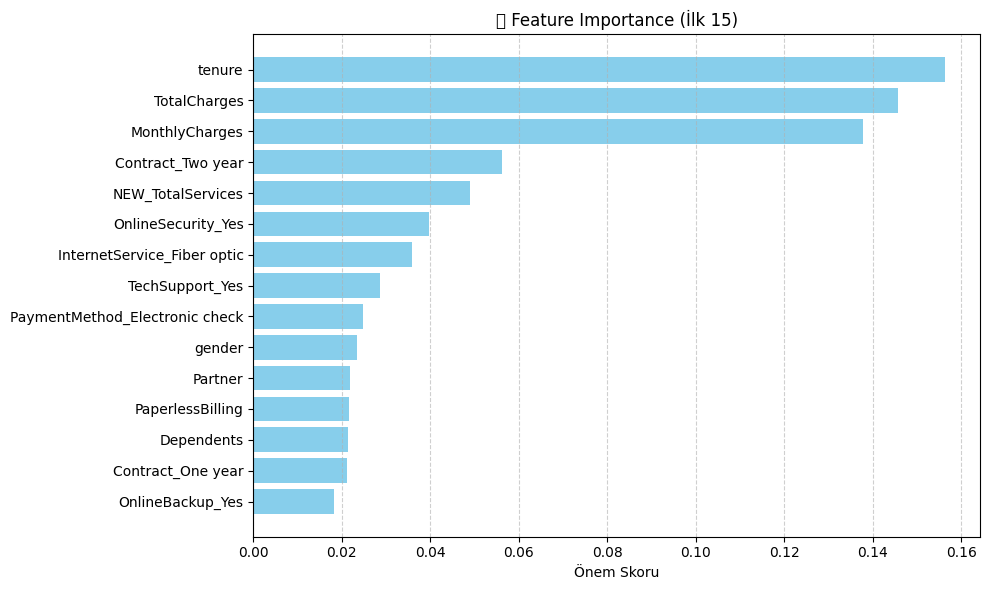

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Eğitimde kullanılan değişken isimleri
feature_names = X.columns

# En iyi modeli örnek olarak kullanalım (örneğin random forest)
model = best_rf  # veya best_xgb, best_gb, vs.

# Feature importance değerlerini al
importances = model.feature_importances_

# DataFrame’e aktar ve sırala
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# İlk 15 özelliği görselleştir
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"].head(15), feat_imp_df["Importance"].head(15), color="skyblue")
plt.xlabel("Önem Skoru")
plt.title("📊 Feature Importance (İlk 15)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()